## Exemplo aplicado a *Multilayer Perceptron*

Neste notebook será demonstrado a execução de um *Multilayer Perceptron* (MLP) utilizando o framework para construção e execução de Redes Neurais Artificias (RNN) Keras.

Vamos iniciar mostrando como carregar uma base de dados da UCI e utilizar o classificador ID3 obtido por meio scikit learn. A base de dados é a *Car Evaluation Data Set* ([https://archive.ics.uci.edu/ml/datasets/Car+Evaluation](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)).

O *dataset* possui os seguintes atributos:
* buying: vhigh, high, med, low. 
* maint: vhigh, high, med, low. 
* doors: 2, 3, 4, 5more. 
* persons: 2, 4, more. 
* lug_boot: small, med, big. 
* safety: low, med, high. 

E as seguintes classes: unacc, acc, good, vgood

### Definições de todos as importações de bibliotecas:

In [40]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from urllib.request import urlopen, urlretrieve

import matplotlib.pyplot as plt
%matplotlib inline

### Código para o carregamento da base de dados

Após o carregamento dos dados, é utilizado a função LabelEncoder para transformar os dados de categóricos para numéricos.

In [43]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
urlretrieve(url, 'car.txt')
filedata = open('car.txt')
data = filedata.read()
dataset = np.array([s.split(',') for s in data.split('\n')][:-1])
print(dataset)
print(len(dataset))
print(dataset.shape)

# Transformação dos valores de categórico para numérico
le = LabelEncoder()
features = np.array([le.fit_transform(f) for f in dataset[:, :-1].T]).T

# obtendo a coluna com as respostas
labels = le.fit_transform(dataset[:, -1])
categorical_labels = to_categorical(labels, num_classes=len(set(labels)))

[['vhigh' 'vhigh' '2' ... 'small' 'low' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'small' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' ... 'small' 'high' 'unacc']
 ...
 ['low' 'low' '5more' ... 'big' 'low' 'unacc']
 ['low' 'low' '5more' ... 'big' 'med' 'good']
 ['low' 'low' '5more' ... 'big' 'high' 'vgood']]
1728
(1728, 7)


### Desenvolvimento da função para plotar os custos e as acurácias:

In [55]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

### Divisão dos dados em treino e teste:

In [56]:
# Dividindo em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    features, categorical_labels, test_size=0.3)

# treino: 80% dos 80% de treino. teste: 20% dos 80% de treino.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, shuffle=True)

### Aplicação do algoritmo de MLP e geração dos resultados

Train on 846 samples, validate on 363 samples
Epoch 1/150
846/846 [==============================] - 0s 246us/step - loss: 1.1120 - acc: 0.6773 - val_loss: 0.8872 - val_acc: 0.6997
Epoch 2/150
846/846 [==============================] - 0s 38us/step - loss: 0.8317 - acc: 0.7151 - val_loss: 0.7698 - val_acc: 0.7052
Epoch 3/150
846/846 [==============================] - 0s 38us/step - loss: 0.7692 - acc: 0.7163 - val_loss: 0.7533 - val_acc: 0.6997
Epoch 4/150
846/846 [==============================] - 0s 44us/step - loss: 0.7422 - acc: 0.7116 - val_loss: 0.7139 - val_acc: 0.6997
Epoch 5/150
846/846 [==============================] - 0s 39us/step - loss: 0.7173 - acc: 0.7163 - val_loss: 0.7215 - val_acc: 0.6942
Epoch 6/150
846/846 [==============================] - 0s 38us/step - loss: 0.7134 - acc: 0.7116 - val_loss: 0.6937 - val_acc: 0.7025
Epoch 7/150
846/846 [==============================] - 0s 38us/step - loss: 0.7128 - acc: 0.7128 - val_loss: 0.6848 - val_acc: 0.7025
Epoch 8/150
846

846/846 [==============================] - 0s 36us/step - loss: 0.2825 - acc: 0.9574 - val_loss: 0.3052 - val_acc: 0.9339
Epoch 62/150
846/846 [==============================] - 0s 36us/step - loss: 0.2771 - acc: 0.9563 - val_loss: 0.3115 - val_acc: 0.9284
Epoch 63/150
846/846 [==============================] - 0s 36us/step - loss: 0.2992 - acc: 0.9326 - val_loss: 0.2928 - val_acc: 0.9449
Epoch 64/150
846/846 [==============================] - 0s 35us/step - loss: 0.2853 - acc: 0.9433 - val_loss: 0.3307 - val_acc: 0.9146
Epoch 65/150
846/846 [==============================] - 0s 36us/step - loss: 0.2816 - acc: 0.9409 - val_loss: 0.3008 - val_acc: 0.9394
Epoch 66/150
846/846 [==============================] - 0s 37us/step - loss: 0.2711 - acc: 0.9504 - val_loss: 0.3165 - val_acc: 0.9146
Epoch 67/150
846/846 [==============================] - 0s 36us/step - loss: 0.2782 - acc: 0.9480 - val_loss: 0.3129 - val_acc: 0.9256
Epoch 68/150
846/846 [==============================] - 0s 37us/step

846/846 [==============================] - 0s 37us/step - loss: 0.2480 - acc: 0.9492 - val_loss: 0.2586 - val_acc: 0.9394
Epoch 122/150
846/846 [==============================] - 0s 38us/step - loss: 0.2328 - acc: 0.9634 - val_loss: 0.2625 - val_acc: 0.9394
Epoch 123/150
846/846 [==============================] - 0s 37us/step - loss: 0.2375 - acc: 0.9574 - val_loss: 0.2646 - val_acc: 0.9394
Epoch 124/150
846/846 [==============================] - 0s 40us/step - loss: 0.2276 - acc: 0.9515 - val_loss: 0.2508 - val_acc: 0.9366
Epoch 125/150
846/846 [==============================] - 0s 38us/step - loss: 0.2166 - acc: 0.9681 - val_loss: 0.2571 - val_acc: 0.9339
Epoch 126/150
846/846 [==============================] - 0s 38us/step - loss: 0.2154 - acc: 0.9610 - val_loss: 0.2516 - val_acc: 0.9366
Epoch 127/150
846/846 [==============================] - 0s 37us/step - loss: 0.2239 - acc: 0.9622 - val_loss: 0.2355 - val_acc: 0.9697
Epoch 128/150
846/846 [==============================] - 0s 37

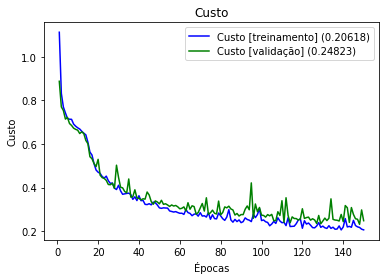

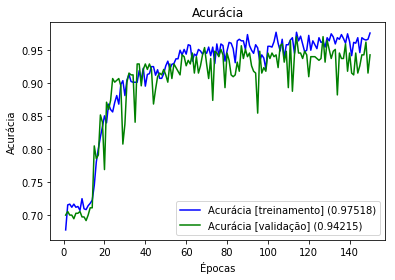

Acurácia: 92.29%
Matriz de confusão:
[[ 96   4  20   0]
 [  8  14   0   0]
 [  2   0 350   0]
 [  0   6   0  19]]

              precision    recall  f1-score   support

           0    0.90566   0.80000   0.84956       120
           1    0.58333   0.63636   0.60870        22
           2    0.94595   0.99432   0.96953       352
           3    1.00000   0.76000   0.86364        25

   micro avg    0.92293   0.92293   0.92293       519
   macro avg    0.85873   0.79767   0.82285       519
weighted avg    0.92386   0.92293   0.92139       519



In [57]:
# definição de uma fração do regularizador
l = 0.01

# desenvolvimento do modelo Keras para uma MLP
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=6,
                kernel_regularizer=regularizers.l2(l)))
# Aplicação de um dropout (caso necessário)
# model.add(Dropout(0.5))
model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l)))
# Aplicação de um dropout (caso necessário)
# model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Aplicação de um modelo de descida de gradiente utilizando o Stocastic Gradient Descendent (SGD)
sgd = SGD(lr=0.05, momentum=0.0)
# Função de otimização da rede: ADAM
adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999)
# Função de custo baseada em dados originalmente categóricos
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=150, batch_size=15,
                    validation_data=(X_val, y_val))
plot_history(history)
score = model.predict_classes(X_test)
y_true = [np.where(x == 1)[0][0] for x in y_test]
print('Acurácia: %0.2f%%' % (accuracy_score(y_true, score) * 100))
print('Matriz de confusão:')
print(confusion_matrix(y_true, score))
print()
print(classification_report(y_true, score, digits=5))